In [1]:
# HIDDEN
# The standard set of libraries we need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

### Iteration ###

It is often the case in programming – especially when dealing with randomness
– that we want to repeat a process multiple times.

Consider the numpy function `random.choice`. It claims to choose randomly
between the elements on an array that we pass it.  Here we make an array of
strings containing two choices:


In [2]:
coin = np.array(['Heads', 'Tails'])

We use `np.random.choice` to choose randomly between these two elements:

In [3]:
np.random.choice(coin)

'Heads'

We might want to check whether `np.random.choice` does in fact pick either
option with about the same probability.  To do that, we could start by runing
the following cell many times to see if we get roughly equal numbers of `"Heads"` and `"Tails"`.

In [4]:
np.random.choice(coin)

'Tails'

We might want to re-run code with slightly different input or other slightly
different behavior. We could copy-paste the code multiple times, but that's
tedious and prone to typos, and if we wanted to do it a thousand times or
a million times, forget it.

A more automated solution is to use a `for` statement to loop over the contents
of a sequence. This is called *iteration*. A `for` statement begins with the
word `for`, followed by a name we want to give each item in the sequence,
followed by the word `in`, and ending with an expression that evaluates to
a sequence. The indented body of the `for` statement is executed once *for each
item in that sequence*.

In [5]:
for i in np.arange(3):
    print(i)

0
1
2


It is instructive to imagine code that exactly replicates a `for` statement
without the `for` statement.  (This is called *unrolling* the loop.)  A `for`
statement simple replicates the code inside it, but before each iteration, it
assigns a new value from the given sequence to the name we chose.  For example,
here is an unrolled version of the loop above:

In [6]:
i = np.arange(3)[0]
print(i)
i = np.arange(3)[1]
print(i)
i = np.arange(3)[2]
print(i)

0
1
2


Notice that the name `i` is arbitrary, just like any name we assign with `=`.

Here we use a `for` statement in a more realistic way: we print the results of five random choices:

In [7]:
for i in np.arange(5):
    print(np.random.choice(coin))

Tails
Heads
Heads
Heads
Heads


In this case, we simply perform exactly the same (random) action several times,
so the code inside our `for` statement does not actually refer to the variable
`i`.

### Augmenting Arrays ###

While the `for` statement above does simulate the results of five tosses of
a coin, the results are simply printed and aren't in a form that we can use for
computation. Thus a typical use of a `for` statement is to create an array of
results, by augmenting it each time.

The `append` method in `numpy` helps us do this. The call
`np.append(array_name, value)` evaluates to a new array that is `array_name`
augmented by `value`. When you use `append`, keep in mind that all the entries
of an array must have the same type.

In [8]:
# A string array with two values
pets = np.array(['Cat', 'Dog'])

In [9]:
np.append(pets, 'Another Pet')

array(['Cat', 'Dog', 'Another Pet'], dtype='<U11')

This keeps the array `pets` unchanged:

In [10]:
pets

array(['Cat', 'Dog'], dtype='<U3')

But often while using `for` loops it will be convenient to mutate an array
– that is, change it – when augmenting it. This is done by assigning the
augmented array to the same name as the original.

In [11]:
pets = np.append(pets, 'Another Pet')
pets

array(['Cat', 'Dog', 'Another Pet'], dtype='<U11')

### Example: Counting the Number of Heads ###

We can now simulate five tosses of a coin and place the results into an array.
We will start by creating an empty array and then appending the result of each
toss.

In [12]:
# An empty array
tosses = np.array([])

for i in np.arange(5):
    tosses = np.append(tosses, np.random.choice(coin))

tosses

array(['Tails', 'Heads', 'Tails', 'Heads', 'Tails'], dtype='<U32')

Let us rewrite the cell with the `for` statement unrolled:

In [13]:
# An empty array
tosses = np.array([])

i = np.arange(5)[0]
tosses = np.append(tosses, np.random.choice(coin))
i = np.arange(5)[1]
tosses = np.append(tosses, np.random.choice(coin))
i = np.arange(5)[2]
tosses = np.append(tosses, np.random.choice(coin))
i = np.arange(5)[3]
tosses = np.append(tosses, np.random.choice(coin))
i = np.arange(5)[4]
tosses = np.append(tosses, np.random.choice(coin))

tosses

array(['Tails', 'Heads', 'Tails', 'Heads', 'Tails'], dtype='<U32')

By capturing the results in an array we have given ourselves the ability to use
array methods to do computations. For example, we can use `np.count_nonzero` to
count the number of heads in the five tosses.

In [14]:
np.count_nonzero(tosses == 'Heads')

2

Iteration is a powerful technique. For example, by running exactly the same
code for 1000 tosses instead of 5, we can count the number of heads in 1000
tosses.

In [15]:
tosses = np.array([])

for i in np.arange(1000):
    tosses = np.append(tosses, np.random.choice(coin))

np.count_nonzero(tosses == 'Heads')

529

### Example: Number of Heads in 100 Tosses ###

It is natural to expect that in 100 tosses of a coin, there will be 50 heads,
give or take a few.

But how many is "a few"? What's the chance of getting exactly 50 heads?
Questions like these matter in data science not only because they are about
interesting aspects of randomness, but also because they can be used in
analyzing experiments where assignments to treatment and control groups are
decided by the toss of a coin.

In this example we will simulate 10,000 repetitions of the following
experiment:

- Toss a coin 100 times and record the number of heads.

The histogram of our results will give us some insight into how many heads are
likely.

As a preliminary, note that `np.random.choice` takes an optional second
argument that specifies the number of choices to make. By default, the choices
are made with replacement, meaning that there is the same chance of getting
a `Head` for all the choices returned. Here is a simulation of 10 tosses of
a coin:

In [16]:
np.random.choice(coin, 10)

array(['Tails', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Tails', 'Tails', 'Tails'], dtype='<U5')

Now let's study 100 tosses. We will start by creating an empty array called
`heads`. Then, in each of the 10,000 repetitions, we will toss a coin 100
times, count the number of heads, and append it to `heads`.

In [17]:
N = 10000

heads = np.array([])

for i in np.arange(N):
    tosses = np.random.choice(coin, 100)
    heads = np.append(heads, np.count_nonzero(tosses == 'Heads'))

heads

array([59., 52., 47., ..., 51., 52., 58.])

Here is a histogram of the data, with bins of width 1 centered at each value of
the number of heads.

(array([  0.,   1.,   6.,   3.,   9.,  10.,  27.,  42.,  64.,  87., 158.,
        219., 298., 392., 466., 624., 667., 792., 789., 774., 797., 767.,
        624., 563., 457., 418., 300., 209., 142.,  99.,  77.,  50.,  30.,
         18.,  11.,   6.,   3.,   1.,   0.]),
 array([30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5,
        41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5,
        52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5,
        63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5]),
 <a list of 39 Patch objects>)

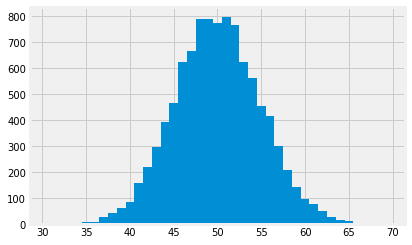

In [18]:
plt.hist(heads, bins=np.arange(30.5, 69.6, 1))

Not surprisingly, the histogram looks roughly symmetric around 50 heads. The
height of the bar at 50 is about 8% per unit. Since each bin is 1 unit wide,
this is the same as saying that about 8% of the repetitions produced exactly 50
heads. That's not a huge percent, but it's the largest compared to the percent
at every other number of heads.

The histogram also shows that in almost all of the repetitions, the number of
heads in 100 tosses was somewhere between 35 and 65. Indeed, the bulk of the
repetitions produced numbers of heads in the range 45 to 55.

While in theory it is *possible* that the number of heads can be anywhere
between 0 and 100, the simulation shows that the range of *probable* values is
much smaller.

This is an instance of a more general phenomenon about the variability in coin
tossing, as we will see later in the course.

Now see [the for loop exercises](../exercises/for_loops).

{% data8page Iteration %}